<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_leNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
import matplotlib.pyplot as plt
import numpy as np

#**Dataset Loading**

In [21]:
import torchvision
import torchvision.transforms as transforms

In [22]:
batch_size = 4
trainset = torchvision.datasets.MNIST(root='./data', train= True, transform=transforms.ToTensor(), download=True)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle= True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform= transforms.ToTensor())
testLoader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [23]:
dataiter = iter(trainLoader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
1


1


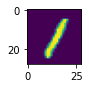

7


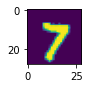

6


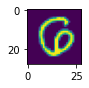

4


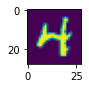

In [24]:
for i in range(4):
  print(labels[i].item())
  img = images[i]
  npimg = img.numpy()
  npimg = np.squeeze(npimg)

  plt.figure(figsize= (1,1))
  plt.imshow(npimg)
  plt.show()

## **LeNet**

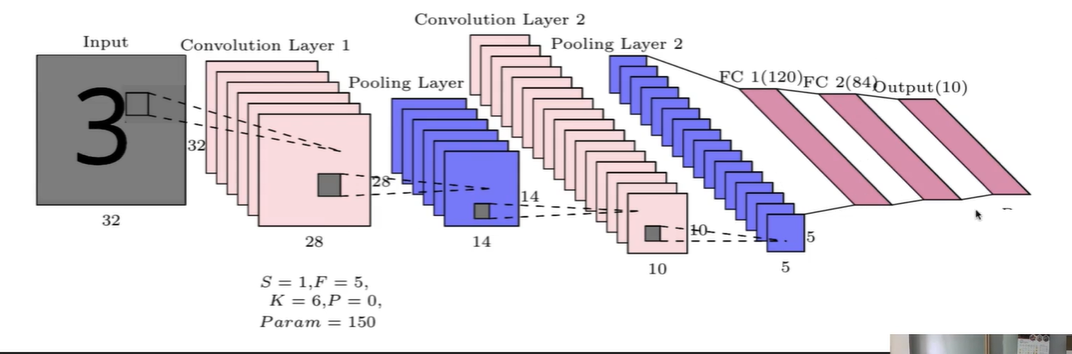

In [25]:
import torch.nn as nn

In [29]:
class leNet(nn.Module):
  def __init__(self):
    super(leNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(1, 6, 5),         # (N, 1, 28, 28) --> (N, 6, 24, 24)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),  # (N, 6, 24, 24) --> (N, 6, 12, 12)
        nn.Conv2d(6, 16, 3),        # (N, 6, 12, 12) --> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)   # (N, 16, 10, 10) --> (N, 16, 5, 5)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),        # (N, 400) --> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84),         # (N, 120) --> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10)           # (N, 120) --> (N, 10)

    )

  def forward(self, x):
    #print(x.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.shape[0], -1)
    #print(x.shape)
    x = self.fc_model(x)
    #print(x.shape)
    return x

In [30]:
net = leNet()
out = net.forward(images)

In [31]:
print(out)

tensor([[-0.1211,  0.0009,  0.0728, -0.0586,  0.0281,  0.0241,  0.0081,  0.1020,
         -0.0820, -0.0560],
        [-0.1250,  0.0138,  0.0888, -0.0579,  0.0240,  0.0251, -0.0160,  0.1063,
         -0.0775, -0.0641],
        [-0.1323,  0.0260,  0.0846, -0.0736,  0.0234,  0.0358,  0.0060,  0.1124,
         -0.0934, -0.0573],
        [-0.1551,  0.0346,  0.0769, -0.0747,  0.0248,  0.0278, -0.0100,  0.1377,
         -0.0837, -0.0845]], grad_fn=<AddmmBackward>)


In [32]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([7, 7, 7, 7])


In [33]:
batch_size = 120

trainset = torchvision.datasets.MNIST(root='./data', train= True, download= True, transform= transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train= False, download= True, transform= transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle=False)

In [34]:
  def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
      input, labels = data
      output = net(input)
      _, pred = torch.max(output.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    return (correct / total)*100

In [35]:
net = leNet()

In [36]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 95.19, Train acc: 95.05
Epoch: 1/16, Test acc: 97.09, Train acc: 97.18
Epoch: 2/16, Test acc: 97.33, Train acc: 97.67
Epoch: 3/16, Test acc: 97.81, Train acc: 98.42
Epoch: 4/16, Test acc: 98.26, Train acc: 98.74
Epoch: 5/16, Test acc: 98.31, Train acc: 99.00
Epoch: 6/16, Test acc: 98.42, Train acc: 99.17
Epoch: 7/16, Test acc: 98.36, Train acc: 99.17
Epoch: 8/16, Test acc: 98.58, Train acc: 99.49
Epoch: 9/16, Test acc: 98.22, Train acc: 99.30
Epoch: 10/16, Test acc: 98.47, Train acc: 99.60
Epoch: 11/16, Test acc: 98.37, Train acc: 99.54
Epoch: 12/16, Test acc: 98.54, Train acc: 99.70
Epoch: 13/16, Test acc: 98.54, Train acc: 99.83
Epoch: 14/16, Test acc: 98.48, Train acc: 99.72
Epoch: 15/16, Test acc: 98.83, Train acc: 99.85


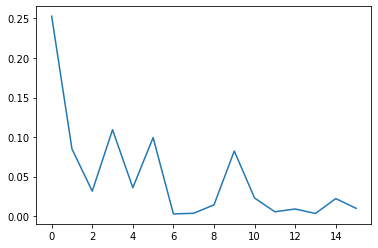

CPU times: user 5min 10s, sys: 3.08 s, total: 5min 13s
Wall time: 5min 13s


In [37]:
%%time
max_epochs = 16
loss_arr = []
loss_epoch_arr = []

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    input, labels = data

    opt.zero_grad()

    outputs = net(input)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())
  
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' %(epoch,max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

#**Move to GPU**

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [39]:
  def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
      input, labels = data
      input, labels = input.to(device), labels.to(device)
      output = net(input)
      _, pred = torch.max(output.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    return (correct / total)*100

In [40]:
net = leNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/32, Test acc: 98.49, Train acc: 99.60
Epoch: 1/32, Test acc: 98.65, Train acc: 99.79
Epoch: 2/32, Test acc: 98.62, Train acc: 99.81
Epoch: 3/32, Test acc: 98.68, Train acc: 99.83
Epoch: 4/32, Test acc: 98.37, Train acc: 99.62
Epoch: 5/32, Test acc: 98.64, Train acc: 99.68
Epoch: 6/32, Test acc: 98.64, Train acc: 99.86
Epoch: 7/32, Test acc: 98.63, Train acc: 99.67
Epoch: 8/32, Test acc: 98.58, Train acc: 99.85
Epoch: 9/32, Test acc: 98.65, Train acc: 99.84
Epoch: 10/32, Test acc: 98.71, Train acc: 99.92
Epoch: 11/32, Test acc: 98.77, Train acc: 99.86
Epoch: 12/32, Test acc: 98.59, Train acc: 99.77
Epoch: 13/32, Test acc: 98.59, Train acc: 99.89
Epoch: 14/32, Test acc: 98.72, Train acc: 99.99
Epoch: 15/32, Test acc: 98.69, Train acc: 100.00
Epoch: 16/32, Test acc: 98.50, Train acc: 99.72
Epoch: 17/32, Test acc: 98.48, Train acc: 99.68
Epoch: 18/32, Test acc: 98.68, Train acc: 99.94
Epoch: 19/32, Test acc: 98.78, Train acc: 99.99
Epoch: 20/32, Test acc: 98.86, Train acc: 100.00


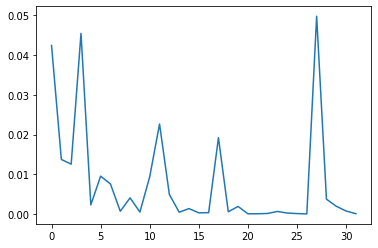

CPU times: user 5min 32s, sys: 1.64 s, total: 5min 33s
Wall time: 5min 34s


In [42]:
%%time
max_epochs = 32
loss_arr = []
loss_epoch_arr = []

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    input, labels = data
    input, labels = input.to(device), labels.to(device)

    opt.zero_grad()

    outputs = net(input)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())
  
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' %(epoch,max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()